## Opérations de Modélisation et d'Analyse de Régression


- Y = variable endogène
- X1, X2 = niveaux de production


- Y (1, 1, 2, 3, 3)
- X1 (2, 3, 5, 7 8)
- X2 (4, 2, 2, 1, 1)

Mettre le modèle sous forme matricielle en spécifiant les dimension
Estimer les paramètres du modèle
Calculer l’estimation de la variance de l’erreur ainsi que les écart types de chacun des coefficients
Calculer R^2 et R^- corrigé


### Mettre le modèle sous forme matricielle en spécifiant les dimension

In [5]:
import numpy as np

# Données
Y_data = np.array([1, 1, 2, 3, 3])
X1_data = np.array([2, 3, 5, 7, 8])
X2_data = np.array([4, 2, 2, 1, 1])

# Création de matrices
Y_matrix = np.array([Y_data]).T  # Transposée pour avoir une colonne
X_matrix = np.column_stack((X1_data, X2_data))

print("Matrice Y (5x1):")
print(Y_matrix)
print("\nMatrice X (5x2):")
print(X_matrix)


Matrice Y (5x1):
[[1]
 [1]
 [2]
 [3]
 [3]]

Matrice X (5x2):
[[2 4]
 [3 2]
 [5 2]
 [7 1]
 [8 1]]


### Estimer les paramètres du modèle

In [9]:
import numpy as np

# Données
Y_data = np.array([1, 1, 2, 3, 3])
X1_data = np.array([2, 3, 5, 7, 8])
X2_data = np.array([4, 2, 2, 1, 1])

# Création de matrices
Y_matrix = np.array([Y_data]).T
X_matrix = np.column_stack((np.ones_like(X1_data), X1_data, X2_data))  # Ajout d'une colonne de 1 pour l'interception

# Estimation des paramètres (méthode des moindres carrés ordinaires)
params = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ Y_matrix

# Affichage des paramètres estimés
print("Paramètres estimés:")
print(f"β0 ≈ {round(float(params[0]), 2)}")
print(f"β1 ≈ {round(float(params[1]), 2)}")
print(f"β2 ≈ {round(float(params[2]), 2)}")

# Affichage de l'équation du modèle avec les paramètres estimés
print("Équation du modèle estimé:")
print(f"Y ≈ {round(float(params[0]), 2)} + {round(float(params[1]), 2)} * X1 + {round(float(params[2]), 2)} * X2")


Paramètres estimés:
β0 ≈ -0.63
β1 ≈ 0.46
β2 ≈ 0.17
Équation du modèle estimé:
Y ≈ -0.63 + 0.46 * X1 + 0.17 * X2


En résumé, les paramètres estimés (beta_0 ≈ -0.63, beta_1 ≈ 0.46, beta_2 ≈ 0.17) et l'équation du modèle (Y ≈ -0.63 + 0.46 * X1 + 0.17 * X2) fournissent une description quantitative de la relation entre les niveaux de production (X1 et X2) et la variable dépendante Y dans votre ensemble de données. Ces résultats sont obtenus à partir d'une analyse de régression linéaire multiple.

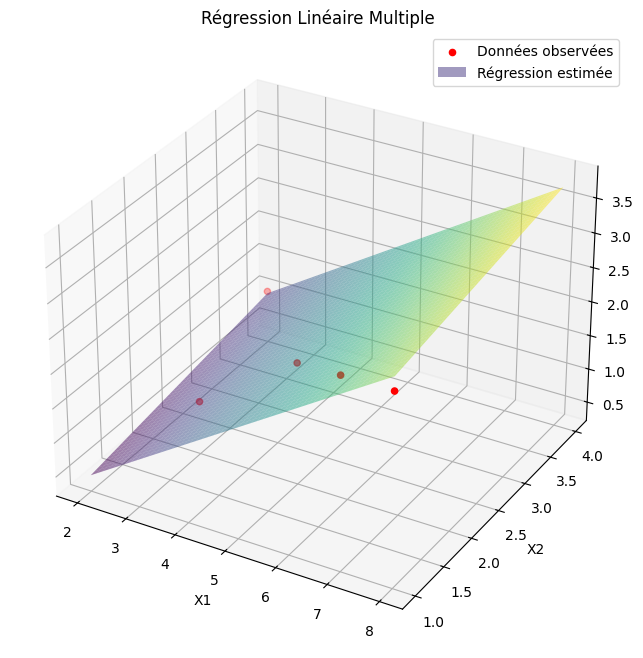

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Données
Y_data = np.array([1, 1, 2, 3, 3])
X1_data = np.array([2, 3, 5, 7, 8])
X2_data = np.array([4, 2, 2, 1, 1])

# Création de matrices
Y_matrix = np.array([Y_data]).T
X_matrix = np.column_stack((np.ones_like(X1_data), X1_data, X2_data))  # Ajout d'une colonne de 1 pour l'interception

# Estimation des paramètres (méthode des moindres carrés ordinaires)
params = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ Y_matrix

# Équation du modèle
def regression_equation(x1, x2):
    return params[0] + params[1] * x1 + params[2] * x2

# Création de données pour la visualisation
x1_range = np.linspace(min(X1_data), max(X1_data), 100)
x2_range = np.linspace(min(X2_data), max(X2_data), 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
Y_pred = regression_equation(X1, X2)

# Affichage graphique
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1_data, X2_data, Y_data, c='r', marker='o', label='Données observées')
ax.plot_surface(X1, X2, Y_pred, alpha=0.5, cmap='viridis', label='Régression estimée')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Régression Linéaire Multiple')

plt.legend()
plt.show()


### Calculer l’estimation de la variance de l’erreur ainsi que les écart types de chacun des coefficients

In [3]:
import numpy as np

# Données
Y_data = np.array([1, 1, 2, 3, 3])
X1_data = np.array([2, 3, 5, 7, 8])
X2_data = np.array([4, 2, 2, 1, 1])

# Création de matrices
Y_matrix = np.array([Y_data]).T
X_matrix = np.column_stack((np.ones_like(X1_data), X1_data, X2_data))  # Ajout d'une colonne de 1 pour l'interception

# Estimation des paramètres (méthode des moindres carrés ordinaires)
params = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ Y_matrix

# Prédictions
predictions = X_matrix @ params

# Résidus
residuals = Y_matrix - predictions

# Nombre d'observations et de variables explicatives
n = len(Y_data)
k = X_matrix.shape[1] - 1  # Nombre de variables explicatives (sans l'interception)

# Estimation de la variance de l'erreur
error_variance = (residuals.T @ residuals) / (n - k - 1)

# Matrice de variance-covariance des coefficients
var_cov_matrix = error_variance * np.linalg.inv(X_matrix.T @ X_matrix)

# Écart types des coefficients (diagonale de la matrice de variance-covariance)
std_errors = np.sqrt(np.diag(var_cov_matrix))

# Affichage des résultats
print("Estimation de la variance de l'erreur:", float(error_variance))
print("\nÉcarts types des coefficients:")
for i, std_err in enumerate(std_errors):
    print(f"Coefficient {i}: {float(std_err)}")


Estimation de la variance de l'erreur: 0.057142857142857134

Écarts types des coefficients:
Coefficient 0: 0.8861749953869028
Coefficient 1: 0.09897433186107855
Coefficient 2: 0.20603150145508484


- Cela signifierait que, en moyenne, vos prédictions sont à environ  0.0571 unités de la valeur réelle observée. C'est une mesure de la dispersion des erreurs dans vos prédictions.

- Prenons le Coefficient 1 comme exemple. Si 𝑋₁ augmente d'une unité, le coefficient associé (0.45714286) suggère que 𝑌 augmentera en moyenne de 0.45714286 unités. L'écart type (0.09897433) indique la variabilité de cette estimation."

### Calculer R^2 et R^- corrigé

In [4]:
import numpy as np

# Données
Y_data = np.array([1, 1, 2, 3, 3])
X1_data = np.array([2, 3, 5, 7, 8])
X2_data = np.array([4, 2, 2, 1, 1])

# Création de matrices
Y_matrix = np.array([Y_data]).T
X_matrix = np.column_stack((np.ones_like(X1_data), X1_data, X2_data))  # Ajout d'une colonne de 1 pour l'interception

# Estimation des paramètres (méthode des moindres carrés ordinaires)
params = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ Y_matrix

# Prédictions
predictions = X_matrix @ params

# Résidus
residuals = Y_matrix - predictions

# Calcul de la somme des carrés totale (SCT)
sct = np.sum((Y_matrix - np.mean(Y_matrix))**2)

# Calcul de la somme des carrés des résidus (SCE)
sce = np.sum(residuals**2)

# Calcul du coefficient de détermination R²
r_squared = 1 - (sce / sct)

# Nombre d'observations et de variables explicatives
n = len(Y_data)
k = X_matrix.shape[1] - 1  # Nombre de variables explicatives (sans l'interception)

# Calcul du coefficient de détermination ajusté R²
r_squared_adjusted = 1 - ((sce / (n - k - 1)) / (sct / (n - 1)))

# Affichage des résultats
print("Coefficient de détermination R²:", float(r_squared))
print("Coefficient de détermination ajusté R²:", float(r_squared_adjusted))


Coefficient de détermination R²: 0.9714285714285714
Coefficient de détermination ajusté R²: 0.9428571428571428


- Un R carré de 0.9714 suggère que 97.14% de la variation dans les ventes peut être expliquée par les dépenses publicitaires et le temps de production.

- Le R carré ajusté de 0.9429 tient compte de la complexité du modèle, indiquant toujours une excellente adéquation du modèle sans surestimer l'importance des variables.